<a href="https://colab.research.google.com/github/Dhananjayak24/SACAIM_Beta_secretase/blob/main/SACAIM_beta_secretase_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing conda and rdkit

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-01-06 10:22:07--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   108MB/s    in 0.8s    

2024-01-06 10:22:08 (108 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/beta_secretase/beta_secretase_bioact_data_preprocessed.csv')

##installing libraries

In [ ]:
!pip install rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,999.085,-1.4355,13.0,13.0
1,893.005,-1.7361,12.0,12.0
2,751.988,2.3535,8.0,9.0
3,737.895,1.9626,8.0,8.0
4,828.020,3.5739,8.0,8.0
...,...,...,...,...
10467,1057.256,2.4833,7.0,13.0
10468,3036.578,2.0591,26.0,43.0
10469,3052.577,1.7647,27.0,44.0
10470,377.485,3.3450,3.0,5.0


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active,999.085,-1.4355,13.0,13.0
1,1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active,893.005,-1.7361,12.0,12.0
2,2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active,751.988,2.3535,8.0,9.0
3,3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate,737.895,1.9626,8.0,8.0
4,4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate,828.020,3.5739,8.0,8.0
...,...,...,...,...,...,...,...,...,...
10467,10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,775.0,active,1057.256,2.4833,7.0,13.0
10468,10468,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,1031.0,intermediate,3036.578,2.0591,26.0,43.0
10469,10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,828.0,active,3052.577,1.7647,27.0,44.0
10470,10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,15.1,active,377.485,3.3450,3.0,5.0


In [ ]:
df_combined = df_combined.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,active,999.085,-1.4355,13.0,13.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,active,893.005,-1.7361,12.0,12.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,active,751.988,2.3535,8.0,9.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,intermediate,737.895,1.9626,8.0,8.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,intermediate,828.020,3.5739,8.0,8.0
...,...,...,...,...,...,...,...,...
10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,775.0,active,1057.256,2.4833,7.0,13.0
10468,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,1031.0,intermediate,3036.578,2.0591,26.0,43.0
10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,828.0,active,3052.577,1.7647,27.0,44.0
10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,15.1,active,377.485,3.3450,3.0,5.0


In [ ]:
df_combined.standard_value.describe()

count    1.047200e+04
mean     3.437005e+04
std      9.562719e+05
min      2.000000e-04
25%      2.500000e+01
50%      1.915000e+02
75%      2.296000e+03
max      8.600000e+07
Name: standard_value, dtype: float64

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value', 1)

    return x

In [ ]:
#  Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

In [ ]:
# Normalizing values
df_norm = norm_value(df_combined)
df_norm

<ipython-input-11-79fb2d057900>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,413.0
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,2.0
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,460.0
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,9000.0
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5600.0
...,...,...,...,...,...,...,...,...
10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,active,1057.256,2.4833,7.0,13.0,775.0
10468,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,intermediate,3036.578,2.0591,26.0,43.0,1031.0
10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,active,3052.577,1.7647,27.0,44.0,828.0
10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,active,377.485,3.3450,3.0,5.0,15.1


In [ ]:
df_norm.standard_value_norm.describe()

count    1.047200e+04
mean     3.437005e+04
std      9.562719e+05
min      2.000000e-04
25%      2.500000e+01
50%      1.915000e+02
75%      2.296000e+03
max      8.600000e+07
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

<ipython-input-10-62152670485b>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
3,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,intermediate,737.895,1.9626,8.0,8.0,5.045757
4,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,intermediate,828.020,3.5739,8.0,8.0,5.251812
...,...,...,...,...,...,...,...,...
10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,active,1057.256,2.4833,7.0,13.0,6.110698
10468,CHEMBL5184180,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,intermediate,3036.578,2.0591,26.0,43.0,5.986741
10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,active,3052.577,1.7647,27.0,44.0,6.081970
10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,active,377.485,3.3450,3.0,5.0,7.821023


In [ ]:
df_final.pIC50.describe()

count    10472.000000
mean         6.588062
std          1.352709
min          1.065502
25%          5.639028
50%          6.717833
75%          7.602060
max         12.698970
Name: pIC50, dtype: float64

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class.to_csv('/content/drive/My Drive/Colab Notebooks/beta_secretase/df_2class.csv')


In [ ]:
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,active,999.085,-1.4355,13.0,13.0,6.384050
1,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,active,893.005,-1.7361,12.0,12.0,8.698970
2,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,active,751.988,2.3535,8.0,9.0,6.337242
5,CHEMBL116826,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,inactive,767.987,1.3690,8.0,9.0,4.468521
6,CHEMBL143239,CC(C)[C@H](NC(=O)C[C@H](O)[C@H](Cc1cc(F)cc(F)c...,active,717.722,4.3196,7.0,7.0,7.698970
...,...,...,...,...,...,...,...,...
10466,CHEMBL5188873,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,active,1099.337,3.8666,7.0,12.0,6.467246
10467,CHEMBL5192597,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccc(O)cc1)N(...,active,1057.256,2.4833,7.0,13.0,6.110698
10469,CHEMBL5184529,CC(C)C[C@H](NC(=O)C[C@H](O)[C@H](Cc1ccccc1)NC(...,active,3052.577,1.7647,27.0,44.0,6.081970
10470,CHEMBL5220695,CC(C)(C)OC(=O)Nc1ccc(O)c(C(=O)NCCCN2CCCCC2)c1,active,377.485,3.3450,3.0,5.0,7.821023


**Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

##Frequency plot for two classes

Text(0, 0.5, 'Frequency')

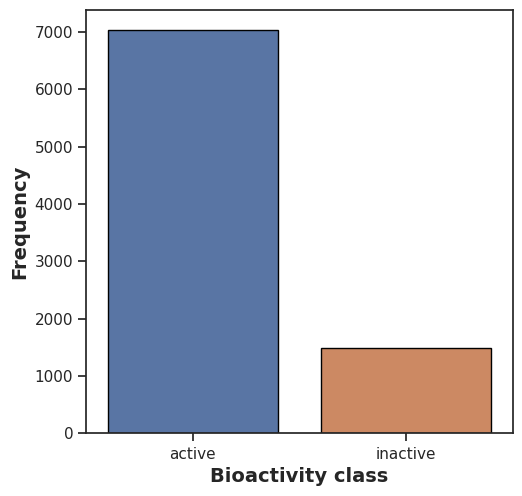

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# plt.savefig('plot_bioactivity_class.pdf')

##Scatter plot of MW versus LogP

In [ ]:
df_2class['pIC50'].skew()

-0.6718791470792498

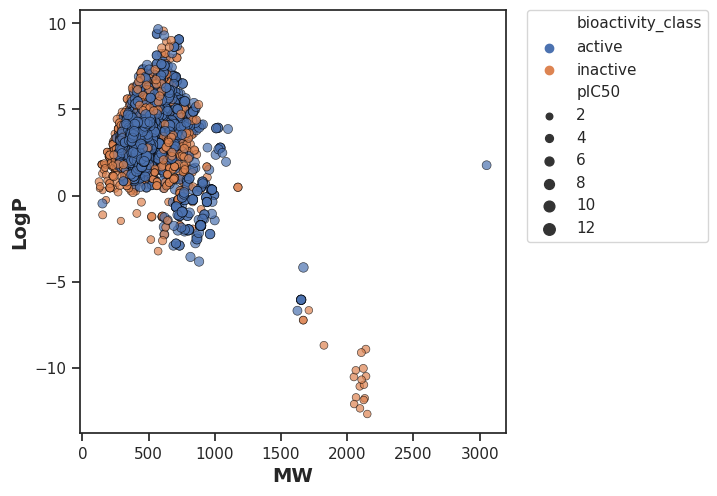

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
# plt.savefig('plot_MW_vs_LogP.pdf')

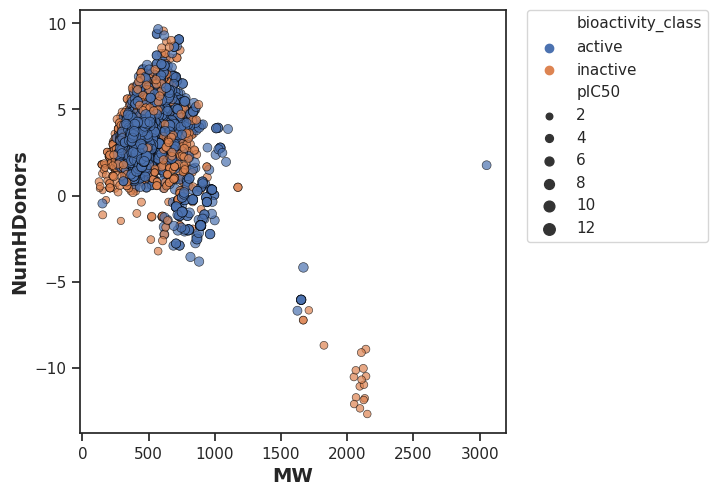

##BOX PLOTS

##pIC50

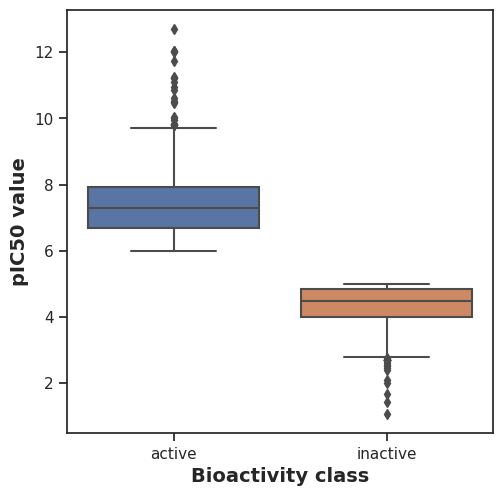

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,10466592.0,0.0,0.05,Different distribution (reject H0)


##MW

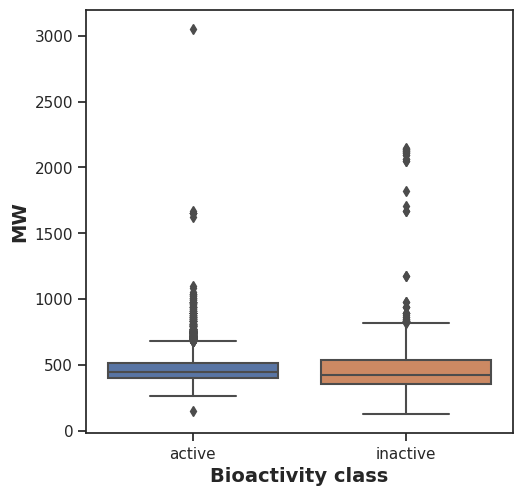

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,6055851.0,1.425878e-21,0.05,Different distribution (reject H0)


##LogP

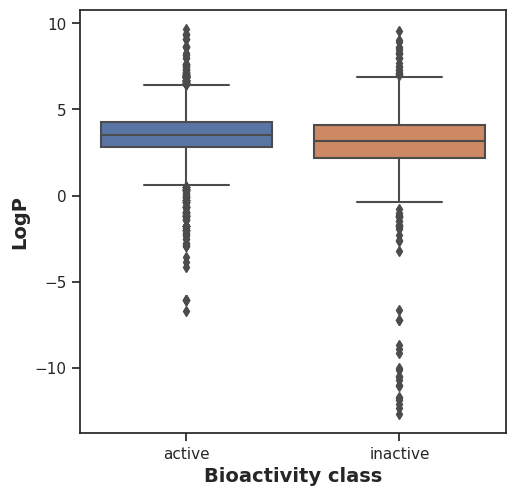

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,6002071.0,4.815846e-19,0.05,Different distribution (reject H0)


##numHDonors

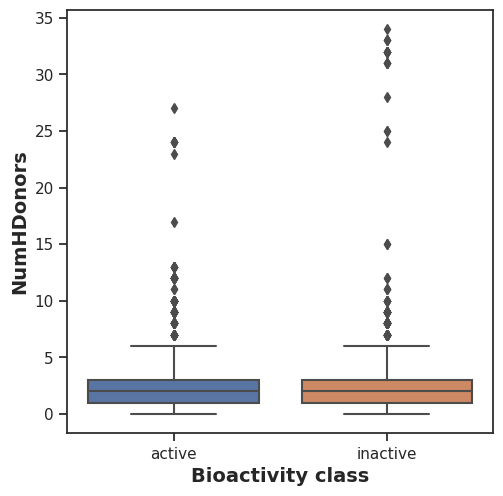

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,5012323.5,0.007259,0.05,Different distribution (reject H0)


##numHAcceptors

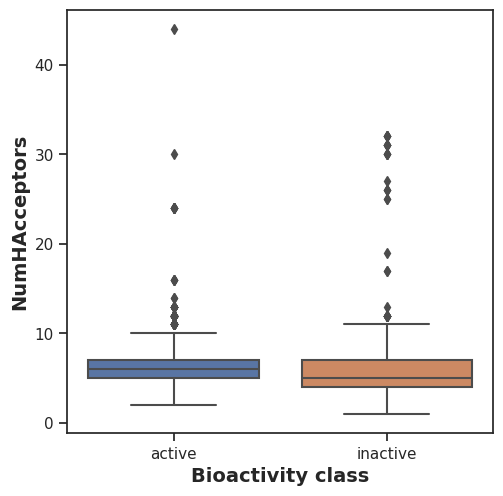

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,6119602.5,9.040037e-26,0.05,Different distribution (reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_LogP.pdf (deflated 35%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)
  adding: plot_MW_vs_LogP.pdf (deflated 1%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 33%)


In [ ]:
! ls

drive				Miniconda3-py37_4.8.2-Linux-x86_64.sh  plot_NumHAcceptors.pdf
mannwhitneyu_LogP.csv		plot_bioactivity_class.pdf	       plot_NumHDonors.pdf
mannwhitneyu_MW.csv		plot_ic50.pdf			       results.zip
mannwhitneyu_NumHAcceptors.csv	plot_LogP.pdf			       sample_data
mannwhitneyu_NumHDonors.csv	plot_MW.pdf
mannwhitneyu_pIC50.csv		plot_MW_vs_LogP.pdf


In [ ]:
! pwd

/content
